In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
import sklearn.metrics as metrics
from mpl_toolkits.basemap import Basemap
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler  # For scaling dataset
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation
from IPython.display import display
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 
from yellowbrick.cluster import silhouette_visualizer
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("earthquakes_2023_global.csv")
df.head(5)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-01-01T00:49:25.294Z,52.0999,178.5218,82.770,3.10,ml,14.0,139.0,0.8700,0.18,...,2023-03-11T22:51:52.040Z,"Rat Islands, Aleutian Islands, Alaska",earthquake,8.46,21.213,0.097,14.0,reviewed,us,us
1,2023-01-01T01:41:43.755Z,7.1397,126.7380,79.194,4.50,mb,32.0,104.0,1.1520,0.47,...,2023-03-11T22:51:45.040Z,"23 km ESE of Manay, Philippines",earthquake,5.51,7.445,0.083,43.0,reviewed,us,us
2,2023-01-01T03:29:31.070Z,19.1631,-66.5251,24.000,3.93,md,23.0,246.0,0.8479,0.22,...,2023-03-11T22:51:29.040Z,Puerto Rico region,earthquake,0.91,15.950,0.090,16.0,reviewed,pr,pr
3,2023-01-01T04:09:32.814Z,-4.7803,102.7675,63.787,4.30,mb,17.0,187.0,0.4570,0.51,...,2023-03-11T22:51:45.040Z,"99 km SSW of Pagar Alam, Indonesia",earthquake,10.25,6.579,0.238,5.0,reviewed,us,us
4,2023-01-01T04:29:13.793Z,53.3965,-166.9417,10.000,3.00,ml,19.0,190.0,0.4000,0.31,...,2023-03-11T22:51:38.040Z,"59 km SSW of Unalaska, Alaska",earthquake,1.41,1.999,0.085,18.0,reviewed,us,us


# Exploratory Data Analysis

In [3]:
#Check shape
df.shape

(26642, 22)

In [4]:
#Check variables type
df.dtypes

time                object
latitude           float64
longitude          float64
depth              float64
mag                float64
magType             object
nst                float64
gap                float64
dmin               float64
rms                float64
net                 object
id                  object
updated             object
place               object
type                object
horizontalError    float64
depthError         float64
magError           float64
magNst             float64
status              object
locationSource      object
magSource           object
dtype: object

In [5]:
#Check dataset description
df.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,26642.000000,26642.000000,26642.000000,26642.000000,25227.000000,25225.000000,24776.000000,26642.000000,25093.000000,26642.000000,24970.000000,25065.000000
mean,16.852798,-11.487497,67.491224,4.007395,42.571332,124.930971,2.692908,0.581575,7.017267,4.475056,0.122735,33.315939
std,30.389200,130.053399,116.762456,0.794423,37.662352,67.430145,4.043568,0.256276,4.072365,4.451649,0.102271,48.022567
min,-65.849700,-179.998700,-3.370000,2.600000,0.000000,8.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000
25%,-6.415275,-149.608650,10.000000,3.220000,19.000000,73.000000,0.612000,0.410000,4.140000,1.848000,0.080000,10.000000
50%,18.884167,-64.811833,21.998000,4.300000,30.000000,111.000000,1.579000,0.590000,7.060000,2.019000,0.111000,18.000000
75%,41.827950,126.965100,66.833000,4.500000,52.000000,165.000000,3.172000,0.750000,9.730000,6.669000,0.150000,36.000000
max,86.593900,179.999400,681.238000,7.800000,423.000000,350.000000,50.820000,1.880000,99.000000,60.670000,4.490000,884.000000


### Extra data points: Obtain year, month and day columns

In [6]:
# Convert the time column to datetime format
df.time = pd.to_datetime(df.time, yearfirst=True)

# Extract year, month, day into separate columns
# df['year'] = df['time'].dt.year
# df['month'] = df['time'].dt.month
# df['day'] = df['time'].dt.day
# df['date'] = df['time'].dt.date
# df

df.time = pd.to_datetime(df.time, yearfirst=True)
df['month'] = df['time'].dt.strftime('%B')
df['year'] = df['time'].dt.year
df['day'] = df['time'].dt.day
df['date'] = df['time'].dt.date

In [7]:
# # Copy the original DataFrame
# cdf = df.copy()

# # Filter based on the type of event, for example, 'Earthquake'
# newdf = cdf[cdf['type'] == 'earthquake']

### Temporal Analysis

#### Earthquakes Occurences by Month

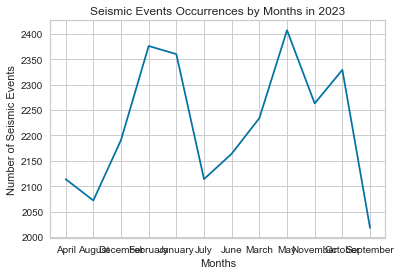

In [8]:
#Group the data by year and count the occurrences
earthquake_counts = df['month'].value_counts().sort_index()

# Create a line graph
plt.plot(earthquake_counts.index, earthquake_counts.values)

# Set the labels and title
plt.xlabel('Months')
plt.ylabel('Number of Seismic Events')
plt.title('Seismic Events Occurrences by Months in 2023')

# Display the line graph
plt.show()

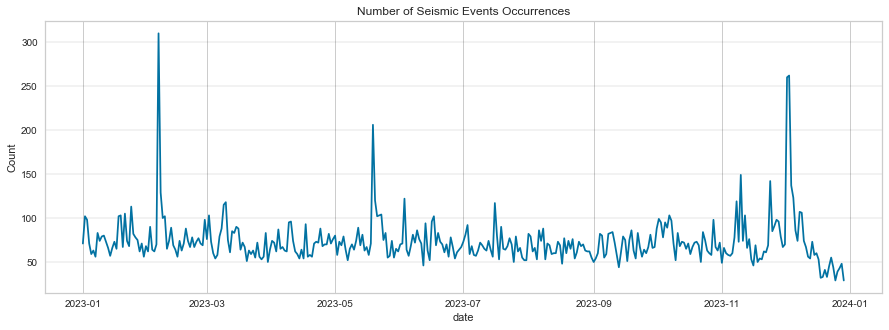

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Group the data by date and count the occurrences
earthquake_counts = df.groupby('date')['day'].count().reset_index(name='Count')

# Create a line graph using Seaborn
plt.figure(figsize=(15, 5))
sns.lineplot(data=earthquake_counts, x='date', y='Count')

# Add grid lines
plt.grid(axis='y', color='black', linestyle='-', linewidth=0.1)

# Set the title
plt.title('Number of Seismic Events Occurrences')

# Show the plot
plt.show()


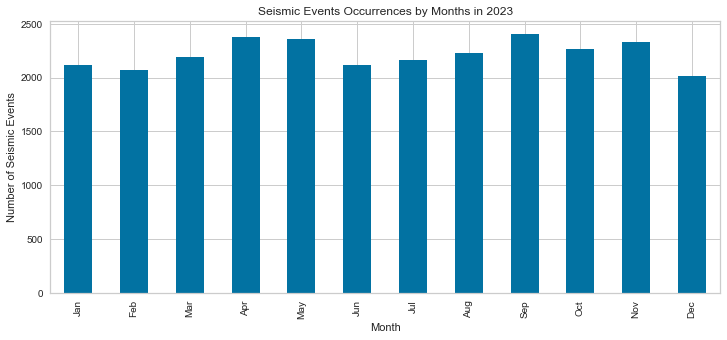

In [10]:
# Calculate the count of earthquakes for each month
earthquakes_by_month = df['month'].value_counts().sort_index()

# Plot the count of earthquakes by month
earthquakes_by_month.plot(kind='bar', figsize=(12, 5))
plt.xlabel('Month')
plt.ylabel('Number of Seismic Events')
plt.title('Seismic Events Occurrences by Months in 2023')
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

In [11]:
# sns.barplot(df.groupby([
#     'month'])['day'].count().sort_values(ascending=False).sort_values(ascending=False).reset_index(name='Count'), x='month', y='Count')
# plt.xticks(rotation=45) 
# plt.title('Seismic Events Occurrences by Month')
# plt.grid(axis='y', color='black', linestyle='-', linewidth=0.1)
# plt.show()

### Density Distribution of Earthquake Magnitude

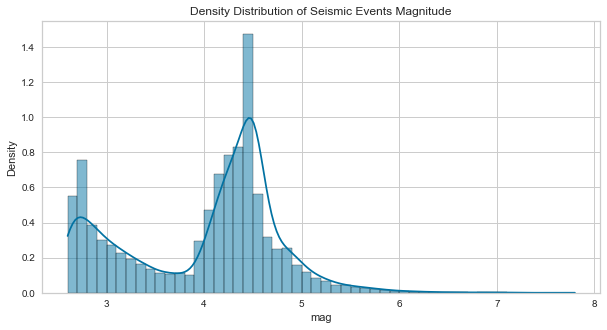

In [12]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='mag', stat='density', binwidth=.1, kde=True)
plt.title('Density Distribution of Seismic Events Magnitude')
plt.show()

### Density Distribution of Earthquake Depth

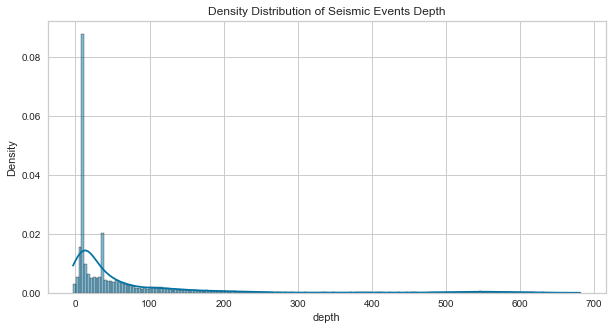

In [13]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='depth', stat='density', kde=True)
plt.title('Density Distribution of Seismic Events Depth')
plt.show()

### Heatmap of Numeric Variables

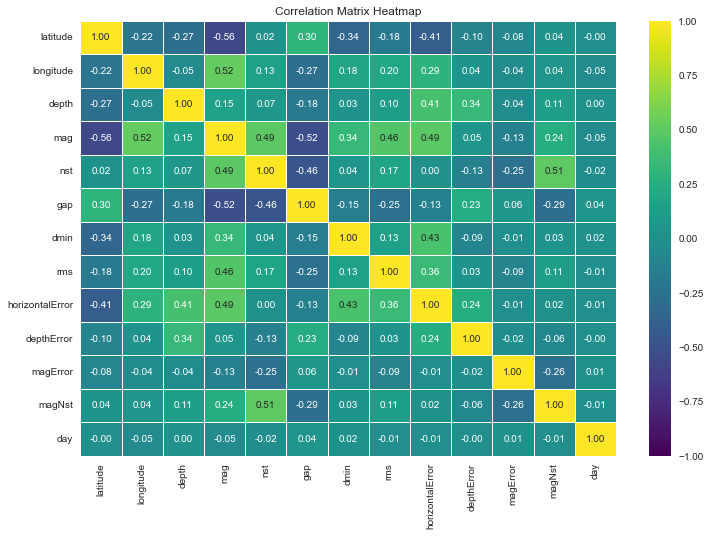

In [14]:
numeric_columns = df.select_dtypes(include=[np.number]).drop(['year'], axis=1)
correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', linewidths=.5, fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

### Plot

In [15]:
fig = px.scatter_geo(
    df,
    lat='latitude',
    lon='longitude',
    size='mag',
    color='mag',
    hover_name='place',
    projection='natural earth',
    title='Geographical Distribution of Seismic Events',
    size_max=15,
    color_continuous_scale='Viridis'
)

fig.show()

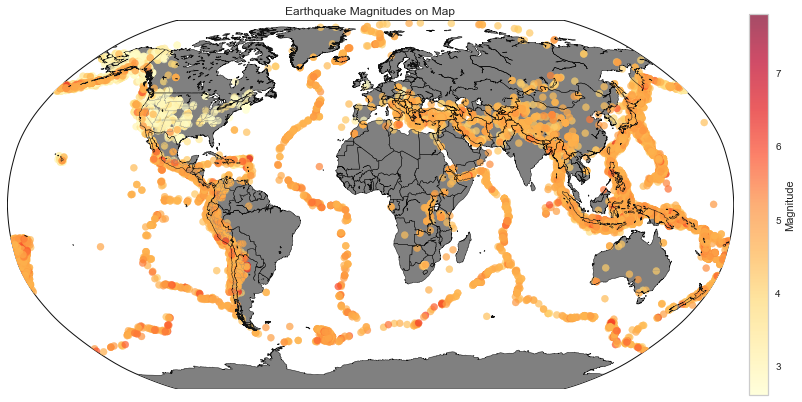

In [16]:
# import matplotlib.pyplot as plt
# from mpl_toolkits.basemap import Basemap

# # Sample data (replace this with your actual latitude and longitude data)
# latitude = df["latitude"]
# longitude = df["longitude"]

# # Create a new map
# fig = plt.figure(figsize=(14, 7))
# map = Basemap(projection='robin', resolution='l', area_thresh=1000.0, lat_0=0, lon_0=0)

# # Draw coastlines, country boundaries, and fill the continents
# map.drawcoastlines(linewidth=0.5)
# map.drawcountries(linewidth=0.25)
# map.fillcontinents(color='gray')

# # Convert latitude and longitude to map coordinates
# x, y = map(longitude, latitude)

# # Plot the data points
# map.scatter(x, y, marker='o', color='blue', label='Data Points')

# # Draw country boundaries
# map.drawcountries(linewidth=0.5, linestyle='solid', color='black')

# # Draw state boundaries within countries
# map.drawstates(linewidth=0.2, linestyle='solid', color='gray')

# # Show the map
# plt.legend()
# plt.show()

import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Sample data (replace this with your actual latitude, longitude, and magnitude data)
latitude = df["latitude"]
longitude = df["longitude"]
magnitude = df["mag"]

# Create a new map
fig = plt.figure(figsize=(14, 7))
map = Basemap(projection='robin', resolution='l', area_thresh=1000.0, lat_0=0, lon_0=0)

# Draw coastlines, country boundaries, and fill the continents
map.drawcoastlines(linewidth=0.5)
map.drawcountries(linewidth=0.25)
map.fillcontinents(color='gray')

# Convert latitude and longitude to map coordinates
x, y = map(longitude, latitude)

# Plot the data points with colormap based on magnitude
scatter = map.scatter(x, y, c=magnitude, cmap='YlOrRd', marker='o', s=50, alpha=0.7)

# Draw country boundaries
map.drawcountries(linewidth=0.5, linestyle='solid', color='black')

# Draw state boundaries within countries
map.drawstates(linewidth=0.2, linestyle='solid', color='gray')

# Add colorbar to show magnitude values
cbar = plt.colorbar(scatter, orientation='vertical', fraction=0.05, pad=0.02)
cbar.set_label('Magnitude')

# Show the map
plt.title('Earthquake Magnitudes on Map')
plt.show()

# Data Preprocessing

### drop null values

In [17]:
#Construct new dataframe
newdf = df[['latitude','longitude','depth','mag']]
#Check null value
newdf.isnull().sum()

latitude     0
longitude    0
depth        0
mag          0
dtype: int64

### check newdf shape

In [18]:
newdf.shape

(26642, 4)

### check correlation

In [19]:
corr = newdf.corr()
display(corr)

,latitude,longitude,depth,mag
latitude,1.000000,-0.223116,-0.274161,-0.562814
longitude,-0.223116,1.000000,-0.047986,0.519695
depth,-0.274161,-0.047986,1.000000,0.149929
mag,-0.562814,0.519695,0.149929,1.000000


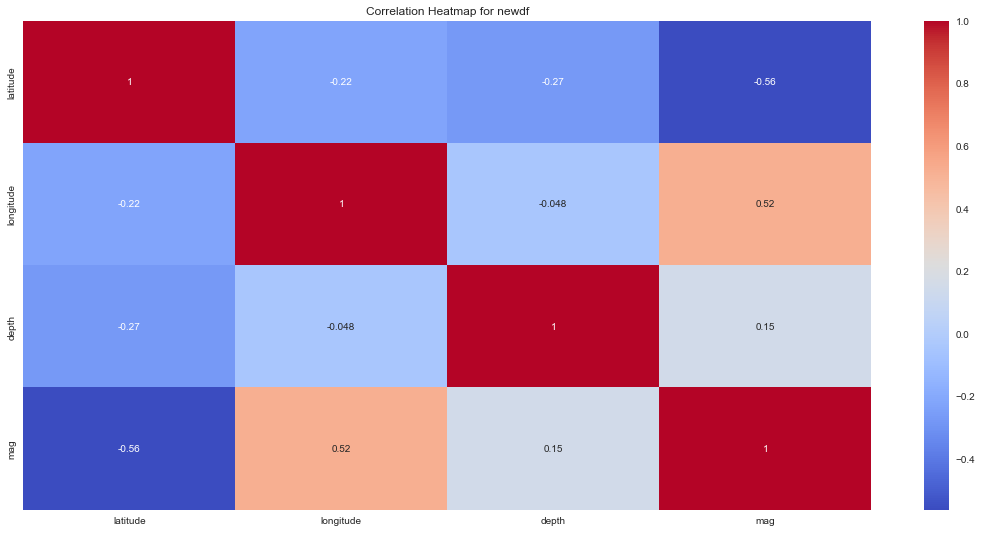

In [20]:
corr_matrix = corr
plt.figure(figsize=(19,9))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for newdf')
plt.show()

### univariate feature selection

In [21]:
x1 = newdf.drop('mag', axis=1)  # Replace 'target_variable' with the actual name of your target variable column
y1 = newdf['mag']
selector = SelectKBest(score_func=f_regression, k=3)  # Replace 'k' with the desired number of top features to select
X_selected = selector.fit_transform(x1, y1)
selected_feature_indices = selector.get_support(indices=True)
selected_features = x1.columns[selected_feature_indices]
print(selected_features)

Index(['latitude', 'longitude', 'depth'], dtype='object')


## Find optimal number of K

### Elbow Method

In [22]:
#Feature scaling to normalize data
ss = StandardScaler()
X = ss.fit_transform(newdf)

#We run cluster analysis using Cluster as 1 until 12. Also, we store the WSS scores.
#The WSS score will be used to create the Elbow Plot 
#WSS = Within-Cluster-Sum of Squared

K = range(1,12)
wss = []
for k in K:
    kmeans=cluster.KMeans(n_clusters=k,init="k-means++")
    kmeans=kmeans.fit(X)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

###  Store the number of clusters along with their WSS scores in a DataFrame

In [23]:
centers = pd.DataFrame({'Clusters': K, 'WSS': wss})
centers

,Clusters,WSS
0,1,106568.000000
1,2,65460.959322
2,3,44401.413482
3,4,32203.745380
4,5,26214.840118
5,6,23376.156171
6,7,21219.334269
7,8,19098.127565
8,9,17559.427544
9,10,16149.303303


### Plot elbow method

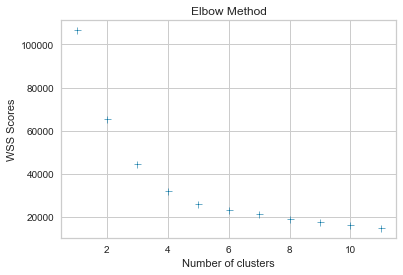

In [24]:
sns.scatterplot(x = 'Clusters', y = 'WSS', data = centers, marker="+")
plt.xlabel('Number of clusters')
plt.ylabel('WSS Scores')
plt.title('Elbow Method')
plt.show()

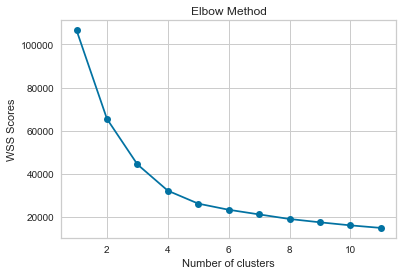

In [25]:
plt.plot(range(1, 12), wss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WSS Scores')
plt.title('Elbow Method')
plt.show()

### Silhouette Method

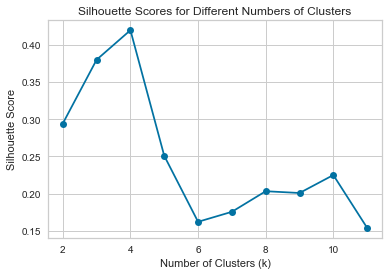

In [26]:
s_scores = []
k_values = range(2, 12)

for k in k_values:
    labels = cluster.KMeans(n_clusters=k, init="k-means++", random_state=200).fit(X).labels_
    s_score = metrics.silhouette_score(newdf, labels, metric="euclidean", sample_size=1000, random_state=200)
    s_scores.append(s_score)

# Plot the silhouette scores
plt.plot(k_values, s_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.show()

In [27]:
# Construct the table with number of clusters and silhouette scores
table_data = list(zip(k_values, s_scores))
table = pd.DataFrame(table_data, columns=['Number of Clusters (k)', 'Silhouette Score'])

# Display the table
table

,Number of Clusters (k),Silhouette Score
0,2,0.294207
1,3,0.380001
2,4,0.419741
3,5,0.250759
4,6,0.162009
5,7,0.175444
6,8,0.203139
7,9,0.200745
8,10,0.224894
9,11,0.153839


## K-Means Clustering

In [57]:
kmeans = cluster.KMeans(n_clusters=2, init="k-means++")
kmeans = kmeans.fit(X)

In [58]:
newdf2 = newdf.copy()
newdf['clusters'] = kmeans.labels_
newdf.to_csv('newdf.csv', index=False)
newdf

,latitude,longitude,depth,mag,clusters
0,52.0999,178.5218,82.770,3.10,1
1,7.1397,126.7380,79.194,4.50,0
2,19.1631,-66.5251,24.000,3.93,1
3,-4.7803,102.7675,63.787,4.30,0
4,53.3965,-166.9417,10.000,3.00,1
...,...,...,...,...,...
26637,-6.9527,154.9829,10.000,5.20,0
26638,32.3262,141.7386,10.000,5.10,0
26639,-7.2411,68.0663,10.000,5.10,0
26640,-19.1602,169.0428,153.264,4.70,0


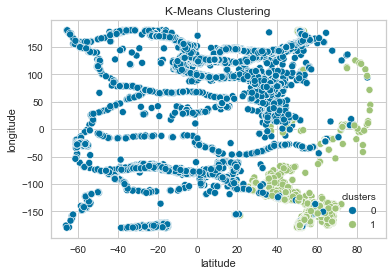

In [59]:
sns.scatterplot(x="latitude", y="longitude", hue="clusters", data=newdf)
plt.title('K-Means Clustering')
plt.show()

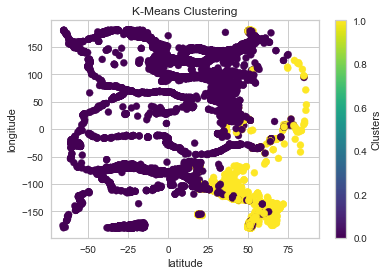

In [60]:
plt.scatter(newdf['latitude'], newdf['longitude'], c=newdf['clusters'], cmap='viridis')
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.title('K-Means Clustering')
plt.colorbar(label='Clusters')
plt.show()

### Silhouette Coefficient

In [61]:
#Calculate silhoutte score
sc1 = silhouette_score(newdf, newdf['clusters'])
print("Silhouette Score (n=2) = ", sc1)

Silhouette Score (n=2) =  0.29163353499099454


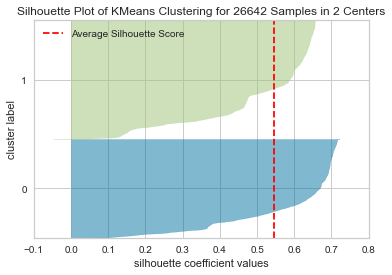

SilhouetteVisualizer(ax=<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 26642 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors='yellowbrick',
                     estimator=KMeans(n_clusters=2, random_state=12))

In [62]:
silhouette_visualizer(KMeans(2, random_state=12), newdf, colors='yellowbrick')

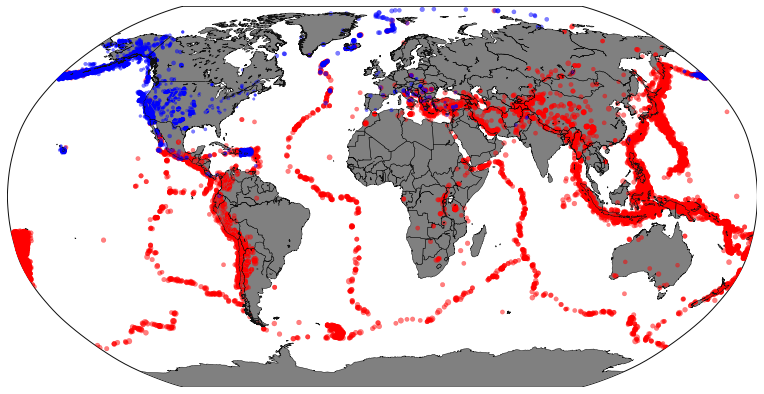

In [63]:
# Create a new map
fig = plt.figure(figsize=(14, 7))
map = Basemap(projection='robin', resolution='l', area_thresh=1000.0, lat_0=0, lon_0=0)

# Draw coastlines, country boundaries, and fill the continents
map.drawcoastlines(linewidth=0.5)
map.drawcountries(linewidth=0.25)
map.fillcontinents(color='gray')

# Convert latitude and longitude to map coordinates
x, y = map(newdf["longitude"].values, newdf["latitude"].values)

# Get cluster labels from your clustering result
cluster_labels = newdf['clusters']  # Replace with the actual cluster labels from your dataframe

# Define a colormap for differentiating clusters
cluster_colors = {0: 'red', 1: 'blue'}  # Customize the colors and labels based on your clustering results

# Plot the data points for each cluster with different colors
for label in set(cluster_labels):
    cluster_data = newdf[cluster_labels == label]
    x_cluster, y_cluster = map(cluster_data["longitude"].values, cluster_data["latitude"].values)
    map.scatter(x_cluster, y_cluster, s=cluster_data["mag"].values**2, c=cluster_colors[label], alpha=0.5)

# Draw country boundaries
map.drawcountries(linewidth=0.5, linestyle='solid', color='black')

# Draw state boundaries within countries
map.drawstates(linewidth=0.2, linestyle='solid', color='gray')

# Show the map
plt.show()

### final dataframe after clustering

In [64]:
newdf.reset_index(drop=True, inplace=True)
newdf

,latitude,longitude,depth,mag,clusters
0,52.0999,178.5218,82.770,3.10,1
1,7.1397,126.7380,79.194,4.50,0
2,19.1631,-66.5251,24.000,3.93,1
3,-4.7803,102.7675,63.787,4.30,0
4,53.3965,-166.9417,10.000,3.00,1
...,...,...,...,...,...
26637,-6.9527,154.9829,10.000,5.20,0
26638,32.3262,141.7386,10.000,5.10,0
26639,-7.2411,68.0663,10.000,5.10,0
26640,-19.1602,169.0428,153.264,4.70,0


In [65]:
#Compare mean magnitude and mean depth
cluster_0_data = newdf[newdf['clusters'] == 0]
cluster_1_data = newdf[newdf['clusters'] == 1]
cluster_0_mean_magnitude = cluster_0_data['mag'].mean()
cluster_1_mean_magnitude = cluster_1_data['mag'].mean()

print("Comparison of Clusters Labels: ")
if cluster_0_mean_magnitude > cluster_1_mean_magnitude:
    print("Cluster 0 has a higher mean magnitude.")
else:
    print("Cluster 1 has a higher mean magnitude.")
    
cluster_0_mean_depth = cluster_0_data['depth'].mean()
cluster_1_mean_depth = cluster_1_data['depth'].mean()

if cluster_0_mean_depth > cluster_1_mean_depth:
    print("Cluster 0 has a higher mean depth.")
else:
    print("Cluster 1 has a higher mean depth.")

Comparison of Clusters Labels: 
Cluster 0 has a higher mean magnitude.
Cluster 0 has a higher mean depth.


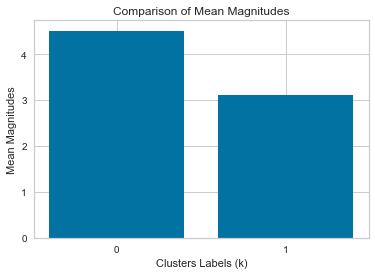

In [66]:
sl = [cluster_0_mean_magnitude, cluster_1_mean_magnitude]
labels = ['0', '1']  # Replace with the labels for each mean magnitude

# Plot the silhouette scores
plt.bar(labels, sl)
plt.xlabel('Clusters Labels (k)')
plt.ylabel('Mean Magnitudes')
plt.title('Comparison of Mean Magnitudes')
# plt.ylim(0,10)  # Set the y-axis limits if needed
plt.show()

In [67]:
print(cluster_0_mean_magnitude)
print(cluster_1_mean_magnitude)

4.509968467153285
3.1030588357770306


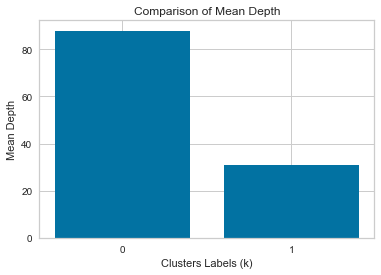

In [68]:
# Define the mean depth
sl2 = [cluster_0_mean_depth, cluster_1_mean_depth]
labels2 = ['0', '1']  # Replace with the labels for each mean magnitude

# Plot the silhouette scores
plt.bar(labels2, sl2)
plt.xlabel('Clusters Labels (k)')
plt.ylabel('Mean Depth')
plt.title('Comparison of Mean Depth')
# plt.ylim(0, 1)  # Set the y-axis limits if needed
plt.show()

In [69]:
print(cluster_0_mean_depth)
print(cluster_1_mean_depth)

87.8970244073335
30.772791100357054
